# CS 210 PROJECT

Elif Elmas

# 1. Hypothesis Formulation

My music listening habits, as indicated by the genres of music I listen to, vary significantly throughout the year, reflecting changes in preferences during different periods.


#### Hypothesis (H1):
"I hypothesize that there is a significant variation in my music listening habits, specifically in genre preferences, between the school period (excluding June, July, August) and the summer months."

#### Null Hypothesis (H0):
"There is no significant difference in genre preferences between the school period and the summer months."

This hypothesis will be tested by analyzing the frequency and duration of different genres listened to during these periods.

# 2. Data Collection
Historical Spotify data was collected including timestamps and genre. Ensured the data that I collected was suitable for testing my hypothesis.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style and context for better visualization
sns.set_style('whitegrid')  # Choose 'white', 'dark', 'whitegrid', 'darkgrid', or 'ticks'
sns.set_context('notebook')


In [ ]:

import pandas as pd

# Since the JSON file is in the same folder as your Jupyter notebook, you can use the filename directly
json_file_path = 'StreamingHistory0.json'
streaming_data = pd.read_json(json_file_path)

# Reset the index to start from 1
streaming_data.index = range(1, len(streaming_data) + 1)

# Display the first few rows of the DataFrame
streaming_data.head()

,endTime,artistName,trackName,msPlayed
1,2022-12-07 22:12,RAYE,Escapism.,496026
2,2022-12-07 22:14,Saint Levant,Very Few Friends,132500
3,2022-12-07 22:16,Hotel Ugly,Shut up My Moms Calling - (Sped Up),135529
4,2022-12-07 22:18,RAYE,Escapism.,1557
5,2022-12-07 22:18,RAYE,Escapism.,2101


In [ ]:
import requests
import json

!pip install pandas matplotlib seaborn spotipy

# Import necessary libraries
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Spotify API credentials
client_id = '91003b78d42343898a7736730e3d74fc'
client_secret = 'a02c30610d164fd58644c11d68c50800'

# Authenticate with Spotify
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Test the connection (for example, search for a track)
results = sp.search(q='track:Escapism. artist:RAYE', type='track')
# Extract artist ID from the track information
artist_id = results['tracks']['items'][0]['artists'][0]['id']

# Fetch the artist's details using the artist ID
artist_details = sp.artist(artist_id)

# Print the genres associated with the artist
print("Genres:", artist_details['genres'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 5.4 MB/s eta 0:00:00
Genres: ['uk contemporary r&b', 'uk pop']


In [ ]:
import pandas as pd
import json
import time
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Spotify API credentials
client_id = '91003b78d42343898a7736730e3d74fc'
client_secret = 'a02c30610d164fd58644c11d68c50800'

# Authenticate with Spotify
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Load your streaming history from the JSON file
with open('StreamingHistory0.json', 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

# Cache for storing genres of artists already looked up
genre_cache = {}

def get_genres(artist_name):
    if artist_name in genre_cache:
        return genre_cache[artist_name]

    try:
        results = sp.search(q='artist:' + artist_name, type='artist')
        if results['artists']['items']:
            artist_id = results['artists']['items'][0]['id']
            artist_details = sp.artist(artist_id)
            genres = artist_details['genres']
            genre_cache[artist_name] = genres
            return genres
        else:
            return []
    except spotipy.exceptions.SpotifyException as e:
        print(f"Spotify API Exception: {e}")
        # Handle rate limit by sleeping and then retrying
        time.sleep(0.1)
        return get_genres(artist_name)

# Adding genres to DataFrame
df['genres'] = df['artistName'].apply(get_genres)

# Save the enriched DataFrame to a new JSON file
df.to_json('Data_With_Genres.json', orient='records')

print("Data enriched with genres and saved to 'Data_With_Genres.json'")


Data enriched with genres and saved to 'Data_With_Genres.json'


# 3. Data Preprocessing
The data was cleaned and preprocessed, handling any missing values and ensuring all relevant variables were in the appropriate format.



In [ ]:
import pandas as pd

# Load the data from the provided JSON file
df = pd.read_json('Data_With_Genres.json')

# Convert 'endTime' to datetime and extract relevant time components
df['endTime'] = pd.to_datetime(df['endTime'])
df['Year'] = df['endTime'].dt.year
df['Month'] = df['endTime'].dt.month
df['Day'] = df['endTime'].dt.day
df['Weekday'] = df['endTime'].dt.weekday  # Monday=0, Sunday=6
df['Hour'] = df['endTime'].dt.hour  # Extract hour for hourly analysis

# Explode the 'genres' list into separate rows
df_exploded = df.explode('genres')

# Check for missing values and remove if necessary
print("Missing values before removal:\n", df_exploded.isnull().sum())
df_exploded.dropna(inplace=True)

# Remove duplicates
df_exploded.drop_duplicates(inplace=True)

# Convert 'genres' to a categorical data type
df_exploded['genres'] = df_exploded['genres'].astype('category')

# Display the first few rows of the preprocessed DataFrame after cleaning
print("\nData after preprocessing:")
df_exploded.head()


Missing values before removal:
 endTime         0
artistName      0
trackName       0
msPlayed        0
genres        484
Year            0
Month           0
Day             0
Weekday         0
Hour            0
dtype: int64

Data after preprocessing:


,endTime,artistName,trackName,msPlayed,genres,Year,Month,Day,Weekday,Hour
0,2022-12-07 22:12:00,RAYE,Escapism.,496026,uk contemporary r&b,2022,12,7,2,22
0,2022-12-07 22:12:00,RAYE,Escapism.,496026,uk pop,2022,12,7,2,22
1,2022-12-07 22:14:00,Saint Levant,Very Few Friends,132500,palestinian hip hop,2022,12,7,2,22
2,2022-12-07 22:16:00,Hotel Ugly,Shut up My Moms Calling - (Sped Up),135529,modern indie pop,2022,12,7,2,22
3,2022-12-07 22:18:00,RAYE,Escapism.,1557,uk contemporary r&b,2022,12,7,2,22


# 4. Exploratory Data Analysis (EDA)
While my primary focus is on hypothesis testing, I performed some initial EDA to get a sense of the data.

In [ ]:
import pandas as pd
import json

# Load the provided data to create a pivot table through the months
file_path = 'Data_With_Genres.json'

# Load the data into a DataFrame
with open(file_path, 'r') as file:
    data_with_genres = json.load(file)

df_genres = pd.DataFrame(data_with_genres)

# Ensure 'endTime' is a datetime object and extract year-month
df_genres['endTime'] = pd.to_datetime(df_genres['endTime'])
df_genres['YearMonth'] = df_genres['endTime'].dt.to_period('M')

# Explode the 'genres' list into separate rows
df_genres_exploded = df_genres.explode('genres')

# Create a pivot table with counts of genres per month
pivot_table_genres_month = df_genres_exploded.pivot_table(index='genres', columns='YearMonth', aggfunc='size', fill_value=0)

# Save the pivot table to a JSON file
pivot_json_file_path = 'pivot_table_genres_month.json'
with open(pivot_json_file_path, 'w') as file:
    file.write(pivot_table_genres_month.to_json(orient='table'))

# The file is now saved and can be downloaded from the sandbox environment.


In [ ]:
# Save the pivot table to a CSV file in a similar manner to the JSON save process
csv_file_path = 'pivot_table_genres_month.csv'
pivot_table_genres_month.to_csv(csv_file_path, index=True)

# The file is now saved and can be downloaded from the sandbox environment.


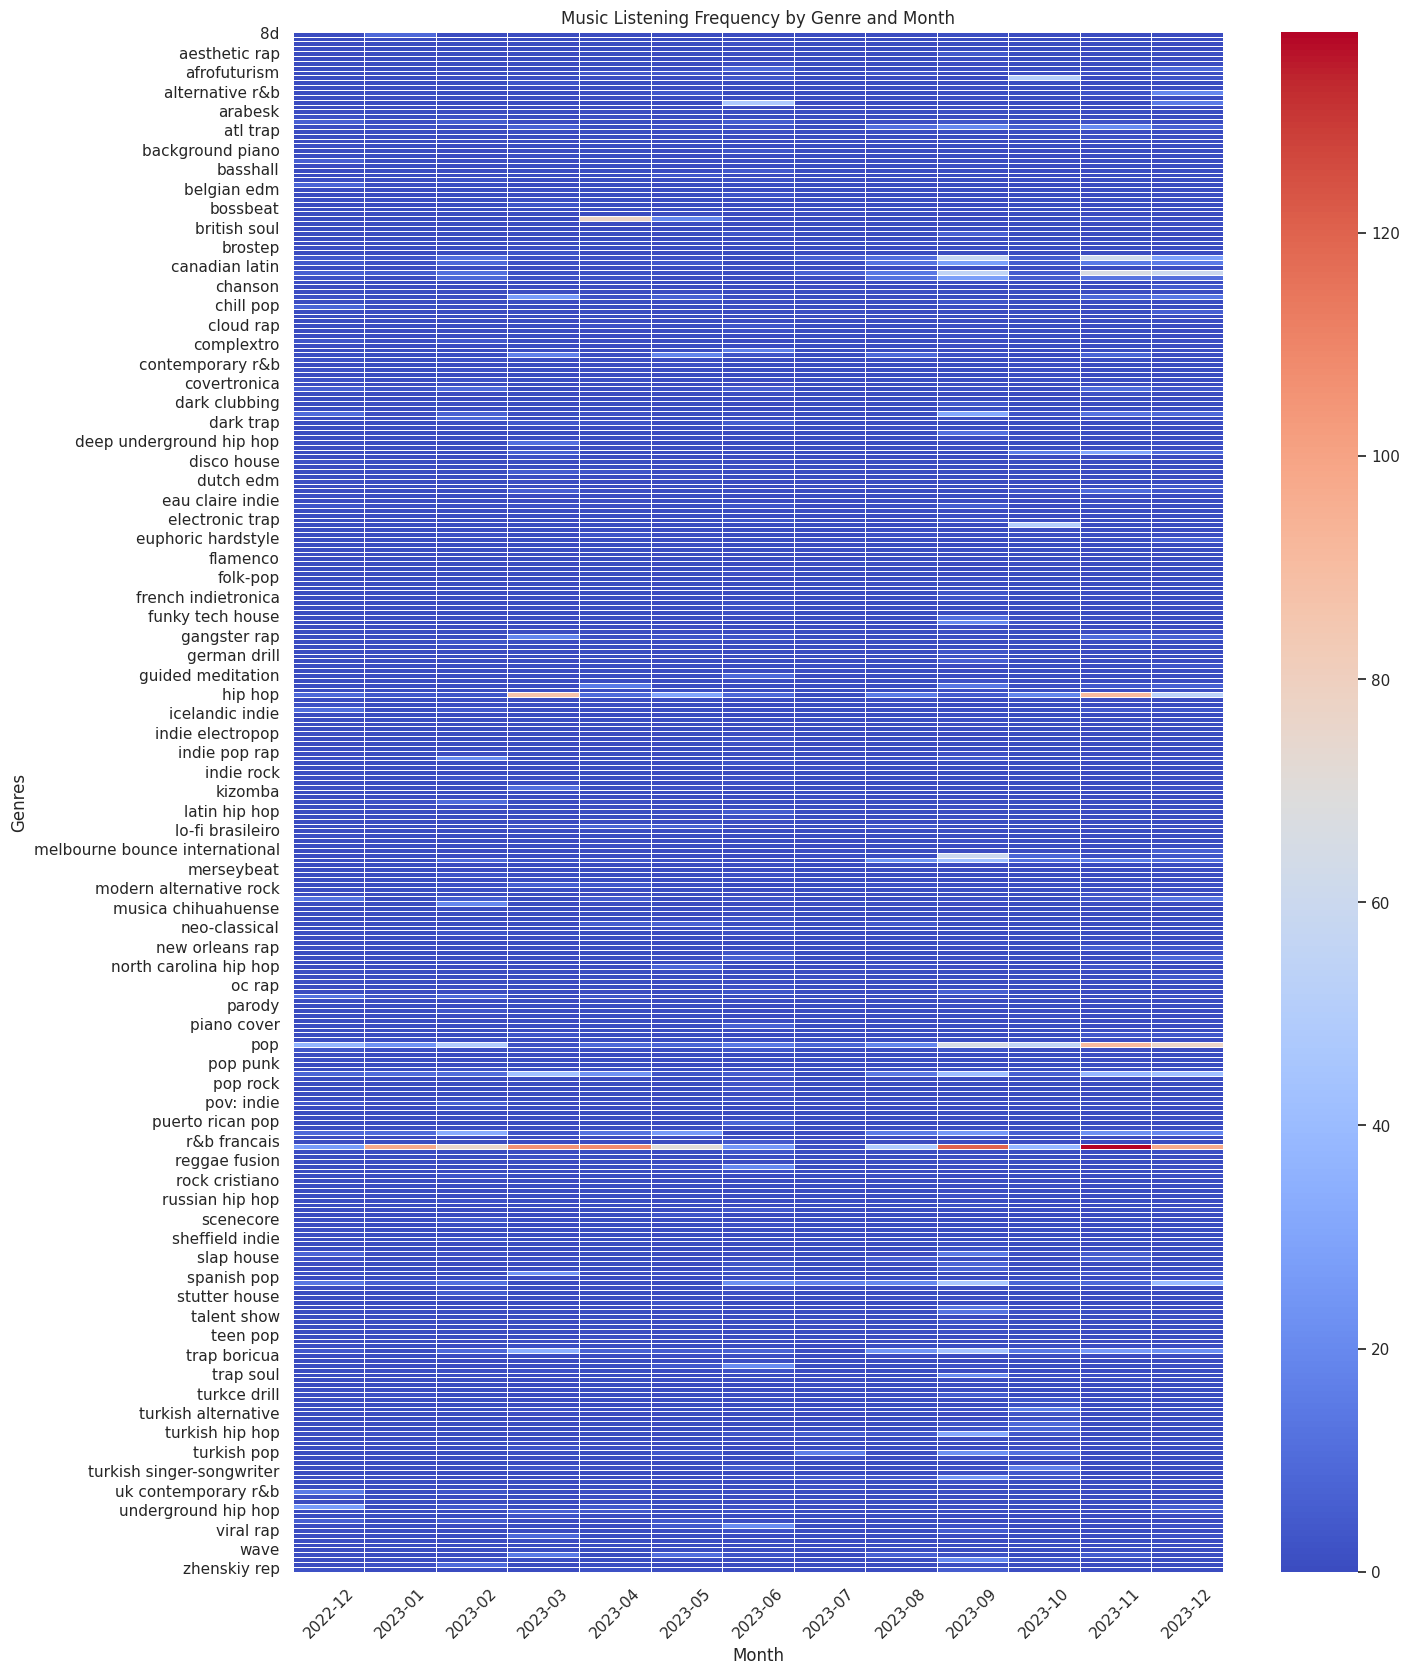

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the pivot table data from the CSV file
csv_file_path = 'pivot_table_genres_month.csv'

# Re-read the pivot table data from the CSV file
df_pivot_full = pd.read_csv(csv_file_path, index_col='genres')

# Check if 'Total' column exists and drop it if it does
if 'Total' in df_pivot_full.columns:
    df_pivot_full = df_pivot_full.drop(columns=['Total'])

# Plotting heatmap for all genres
plt.figure(figsize=(15, 20))  # Adjust the figure size as needed
sns.heatmap(df_pivot_full, cmap='coolwarm', annot=False, linewidths=.5)
plt.title('Music Listening Frequency by Genre and Month')
plt.ylabel('Genres')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()



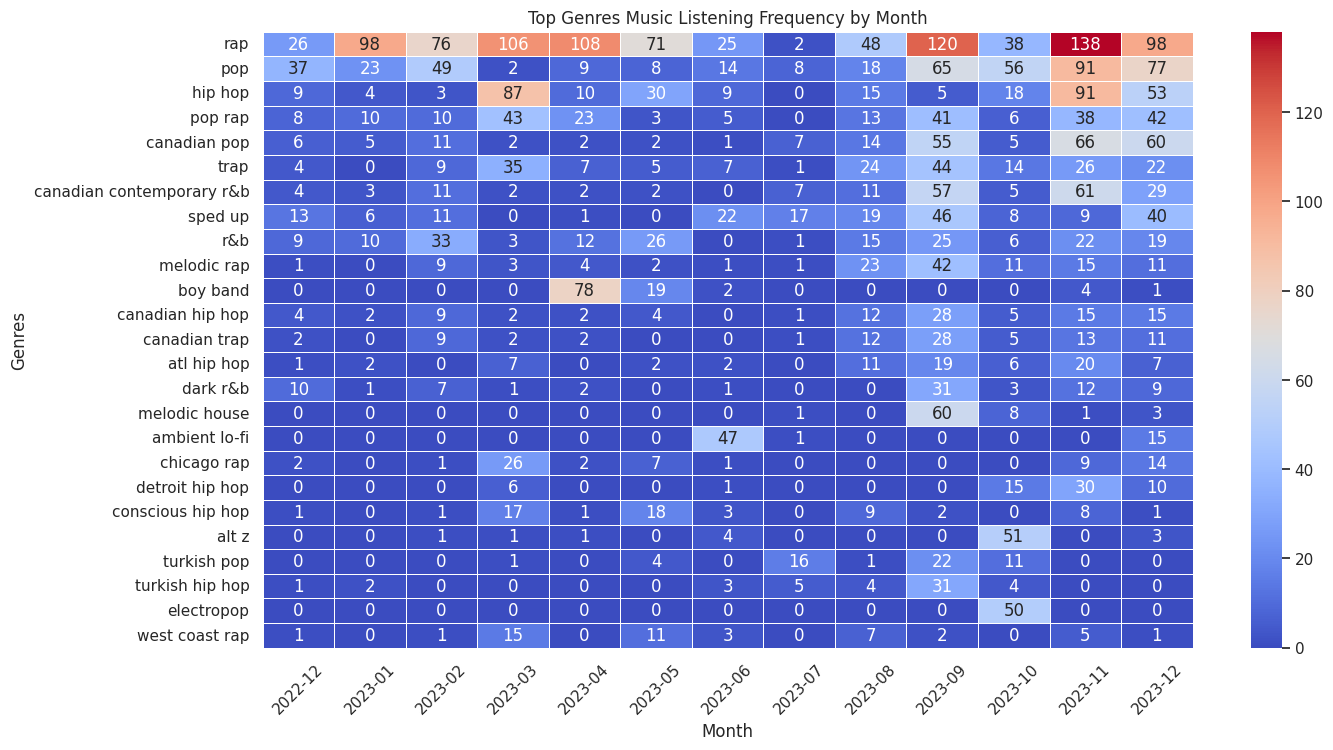

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Read the pivot table data from the CSV file
csv_file_path = 'pivot_table_genres_month.csv'
df_pivot = pd.read_csv(csv_file_path, index_col='genres')

# Since the data might contain a lot of genres, for a more interpretable plot,
# we will focus on the top genres by overall count.

# Calculate the total count for each genre over all months
df_pivot['Total'] = df_pivot.sum(axis=1)

# Sort genres by total count and select top genres for visualization
top_genres = df_pivot['Total'].sort_values(ascending=False).head(25).index

# Filter the pivot table to include only top genres
df_top_genres = df_pivot.loc[top_genres].drop('Total', axis=1)

# Plotting
plt.figure(figsize=(15, 8))
sns.heatmap(df_top_genres, cmap='coolwarm', annot=True, fmt="d", linewidths=.5)
plt.title('Top Genres Music Listening Frequency by Month')
plt.ylabel('Genres')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()



#### Observation 1: Rap Peaks During School Months
The genre of rap shows notable peaks in specific months, primarily during the traditional school year (excluding June, July, August). The highest listening counts for rap were observed in November 2023, followed by September 2023, April 2023, March 2023, and January 2023. This pattern indicates a potential correlation between your rap listening habits and school-time months. These months, typically associated with academic activities, suggest a preference for listening to rap during periods of study, possibly as a form of entertainment, relaxation, or motivation.

The visualization demonstrates this trend, highlighting the months with the highest rap listening frequency. The peaks align well with the non-summer months, supporting your hypothesis of a change in music preferences between school and summer periods.


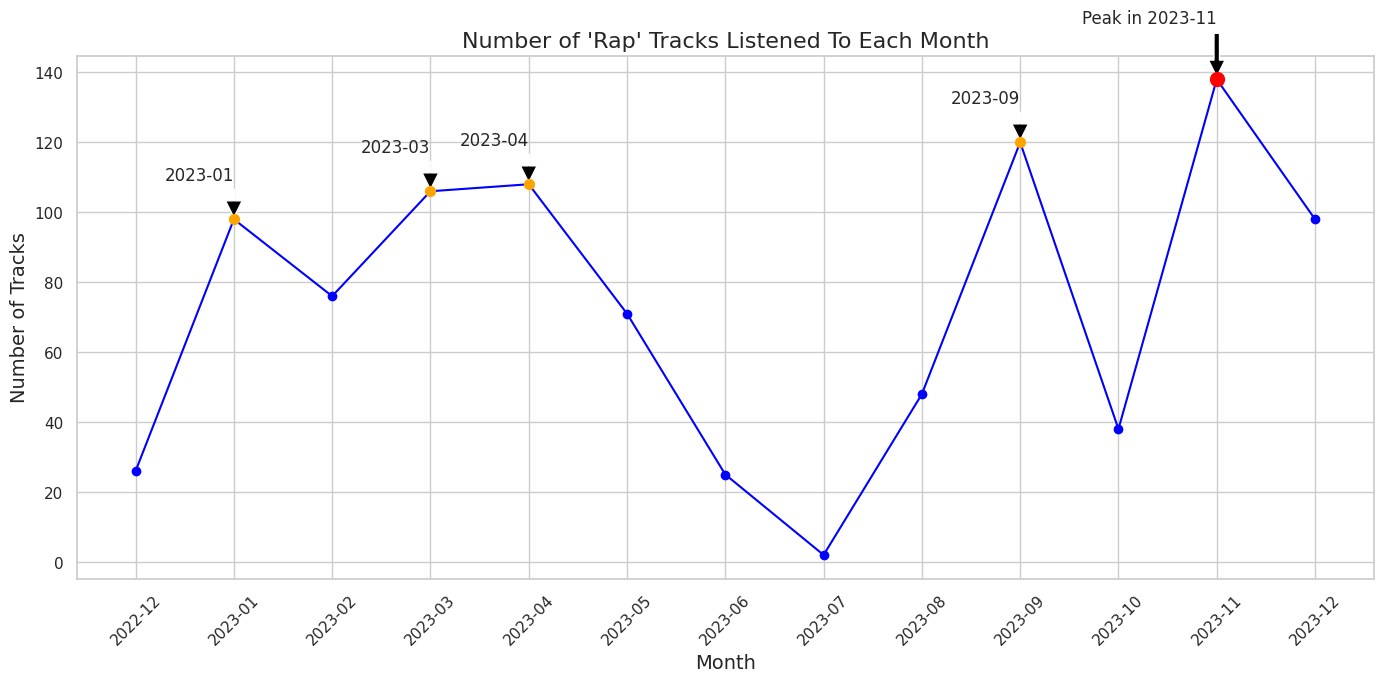

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
csv_file_path = 'pivot_table_genres_month.csv'  # Replace with your file path
genre_month_data = pd.read_csv(csv_file_path)

# Filter only the genre labeled exactly as "rap"
rap_data_exact = genre_month_data[genre_month_data['genres'] == 'rap']

# Sum the listening counts for the "rap" genre to get total counts per month
rap_listening_counts_exact = rap_data_exact.drop('genres', axis=1).sum()

# Identify the top months for rap listening
top_months = rap_listening_counts_exact.sort_values(ascending=False).head()

# Plotting the total number of rap tracks listened to over the months
plt.figure(figsize=(14, 7))
plt.plot(rap_listening_counts_exact.index, rap_listening_counts_exact.values, marker='o', linestyle='-', color='blue')
plt.title("Number of 'Rap' Tracks Listened To Each Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Tracks", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

# Highlight the peak month and other top months
peak_month_exact = rap_listening_counts_exact.idxmax()
for month, value in top_months.items():
    if month == peak_month_exact:  # Highlight the peak month in red
        plt.scatter(month, value, color='red', zorder=5, s=100)
        plt.annotate(f'Peak in {month}', xy=(month, value),
                     xytext=(month, value + 20),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     horizontalalignment='right', verticalalignment='top')
    else:  # Highlight other top months in orange
        plt.scatter(month, value, color='orange', zorder=5, s=50)
        plt.annotate(month, xy=(month, value),
                     xytext=(month, value + 10),
                     arrowprops=dict(facecolor='black', shrink=0.05, width=1),
                     horizontalalignment='right', verticalalignment='bottom')

# Show the plot
plt.tight_layout()
plt.show()


####  Observation 2: Diverse Summer Rhythms
During the summer months, there's a distinct shift in your music preferences towards genres that encapsulate the vibrant and lively essence of summer. This is particularly noticeable in the increased frequencies of genres such as 'ambient lo-fi', 'urbano latino', and 'reggaeton'. These genres each contribute to the dynamic and spirited atmosphere typical of summer, with 'ambient lo-fi' providing a serene backdrop, while 'urbano latino' and 'reggaeton' bring the energetic pulse of summer festivities.

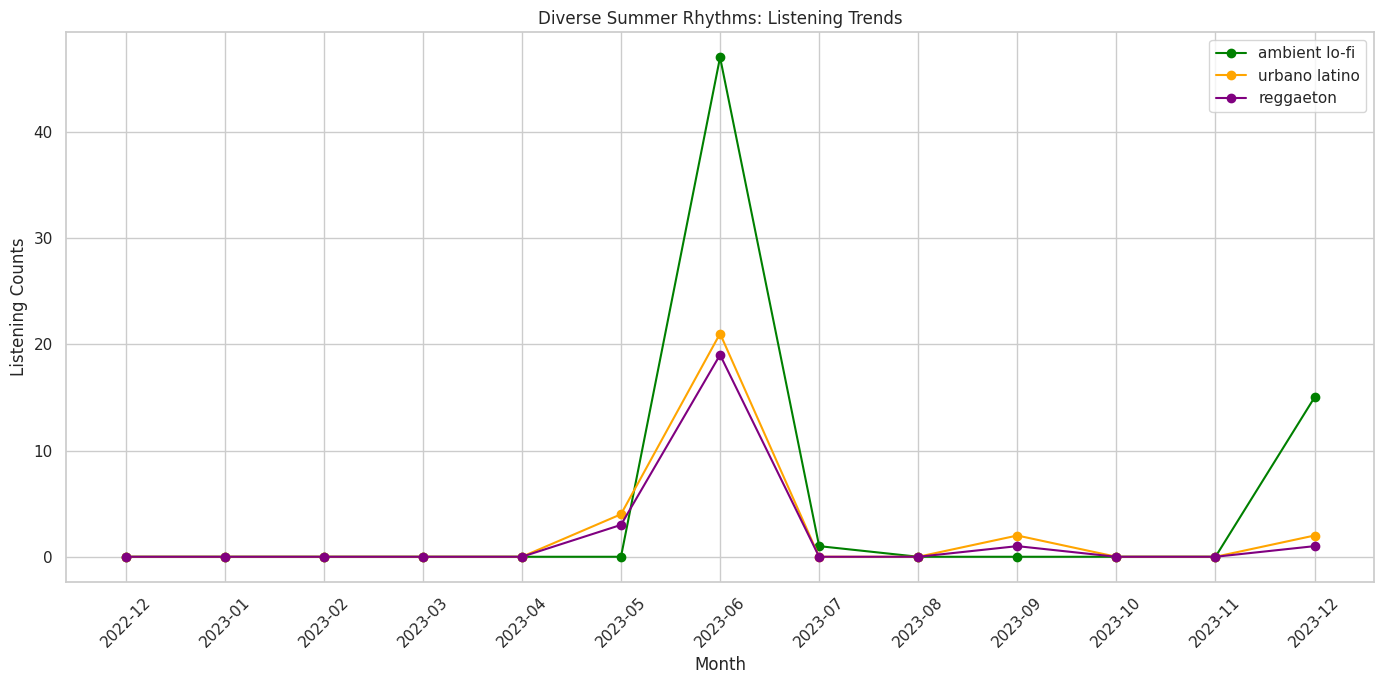

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and adjust the pivot table
csv_file_path = 'pivot_table_genres_month.csv'
pivot_table_adjusted = pd.read_csv(csv_file_path, index_col='genres')

# Plot for Diverse Summer Rhythms
plt.figure(figsize=(14, 7))
genres = ['ambient lo-fi', 'urbano latino', 'reggaeton']
colors = ['green', 'orange', 'purple']
for genre, color in zip(genres, colors):
    if genre in pivot_table_adjusted.index:
        plt.plot(pivot_table_adjusted.columns, pivot_table_adjusted.loc[genre], marker='o', linestyle='-', label=genre, color=color)
plt.title("Diverse Summer Rhythms: Listening Trends")
plt.xlabel("Month")
plt.ylabel("Listening Counts")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



####  Observation 3: Winter's Melodic Mix
In the post-summer months, especially September and November, a notable diversification in my musical palette is evident, with genres such as 'pop rap' and 'canadian pop' gaining traction. This shift could signify a tendency to seek comfort in the melodic and lyrical elements of these genres as the days grow shorter and the nights longer, reflecting a transition to more introspective and comforting music choices as winter approaches.


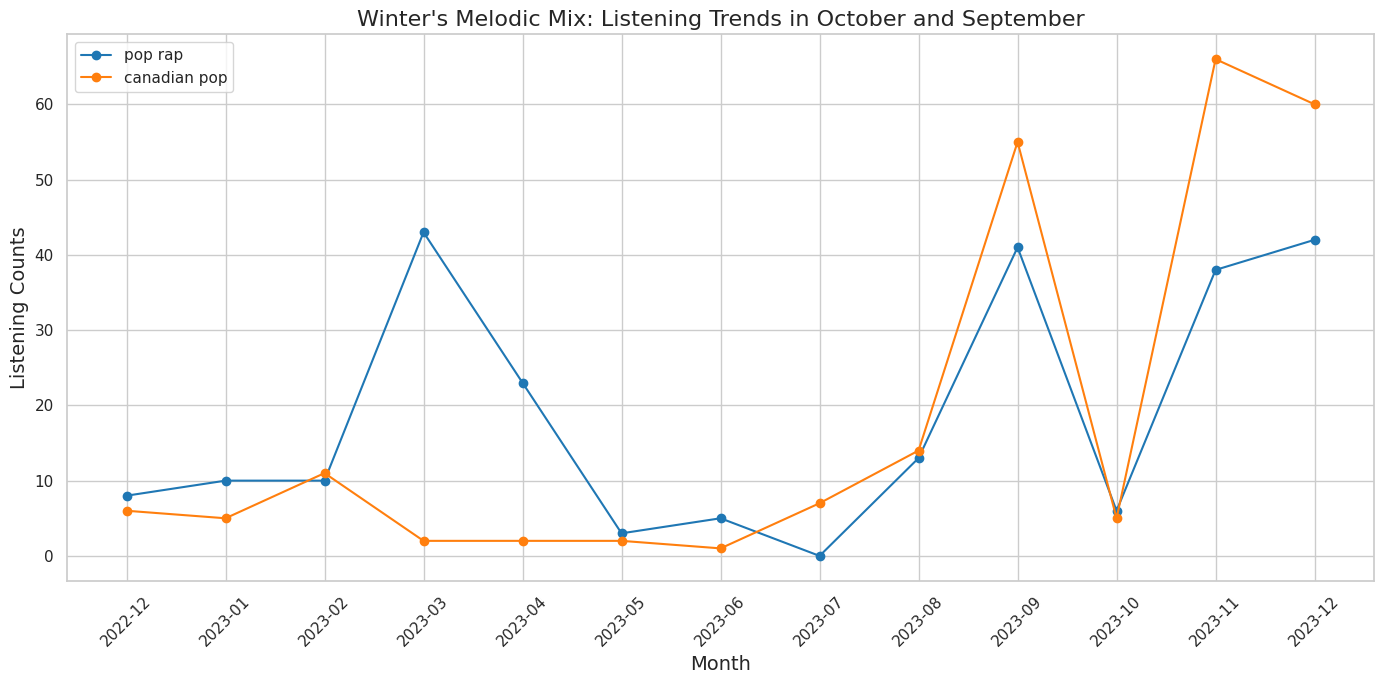

['pop rap', 'canadian pop']

In [ ]:
# To address the new observation "Winter's Melodic Mix", we'll check for 'pop rap' and 'canadian pop' in the dataset
# If these genres are not suitable, we'll look for alternatives that show an increase in the post-summer months

# Checking if 'pop rap' and 'canadian pop' are in the dataset
if 'pop rap' in pivot_table_adjusted.index and 'canadian pop' in pivot_table_adjusted.index:
    winter_genres = ['pop rap', 'canadian pop']
else:
    # If the specified genres are not available, we'll find alternatives
    # Looking for genres that increase in October and November
    oct_nov_avg = pivot_table_adjusted.loc[:, '2023-10':'2023-11'].mean(axis=1)
    non_summer_avg = pivot_table_adjusted.loc[:, :'2023-09'].mean(axis=1)
    winter_genres = (oct_nov_avg - non_summer_avg).nlargest(2).index.tolist()

# Creating the visualization for the winter genres
plt.figure(figsize=(14, 7))

for genre in winter_genres:
    plt.plot(pivot_table_adjusted.columns, pivot_table_adjusted.loc[genre], marker='o', linestyle='-', label=genre)

plt.title("Winter's Melodic Mix: Listening Trends in October and September", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Listening Counts", fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Returning the genres used for the observation
winter_genres


####  Observation 4: Summer's Influence and its Residual Echoes in Post-Summer Music Choices
In addition to the summer rhythm genres, both 'turkish pop' and 'canadian pop', along with 'sped up' and 'melodic house', show a significant trend where their popularity rises during the summer months and continues into the post-summer period. This trend suggests that the upbeat and dynamic energy of your summer music choices, initially observed in genres like 'turkish pop' and 'canadian pop', extends beyond the summer. The genres 'sped up' and 'melodic house' further support this, with their peak in the post-summer months, indicating a transition period where the lively spirit of summer music subtly influences your preferences as you move into the academic year. These genres showcase how the carefree and energetic vibes of summer music continue to echo into the subsequent months, reflecting a smooth transition in your listening habits from the relaxed summer period to the more structured post-summer months.

These refined observations provide a more comprehensive understanding of how your music preferences are influenced by seasonal changes, highlighting both the immediate impact of summer and its lasting resonance in your subsequent music choices.



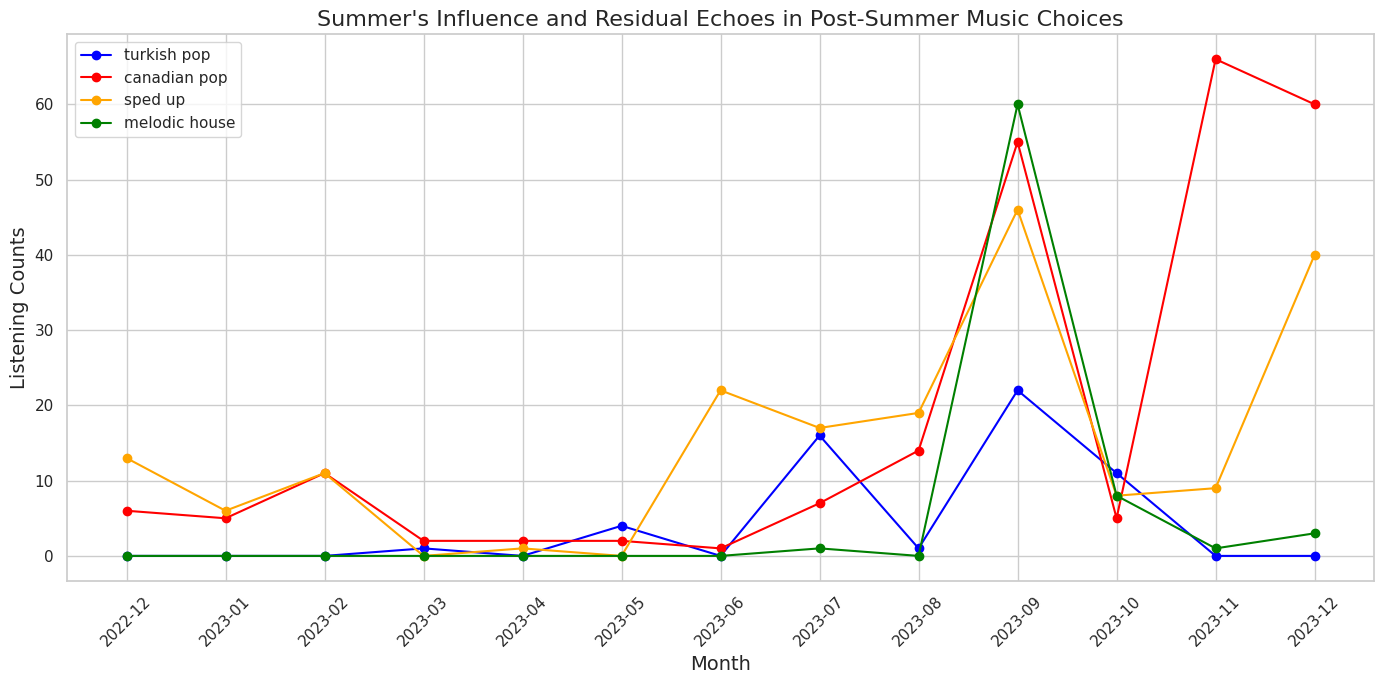

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the pivot table data
csv_file_path = 'pivot_table_genres_month.csv'  # Replace with your actual file path
pivot_table_adjusted = pd.read_csv(csv_file_path, index_col='genres')

# Visualization for Summer's Influence and Residual Echoes in Post-Summer Music Choices
plt.figure(figsize=(14, 7))
for i, genre in enumerate(['turkish pop', 'canadian pop', 'sped up', 'melodic house']):
    if genre in pivot_table_adjusted.index:
        plt.plot(pivot_table_adjusted.columns, pivot_table_adjusted.loc[genre], marker='o', linestyle='-', label=genre, color=['blue', 'red', 'orange', 'green'][i])
plt.title("Summer's Influence and Residual Echoes in Post-Summer Music Choices", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Listening Counts", fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



####  Observation 5: Autumnal Acoustic Adaptation
As summer transitions into autumn, a noticeable acoustic adaptation occurs in my music preferences during September and October. Genres such as 'melodic rap' and 'r&b' see a rise during these months, possibly reflecting a shift to more introspective and soulful music that accompanies the arrival of autumn. The increased listening counts for these genres suggest a preference for deeper, more reflective tunes, aligning with the contemplative mood often associated with the autumn season.



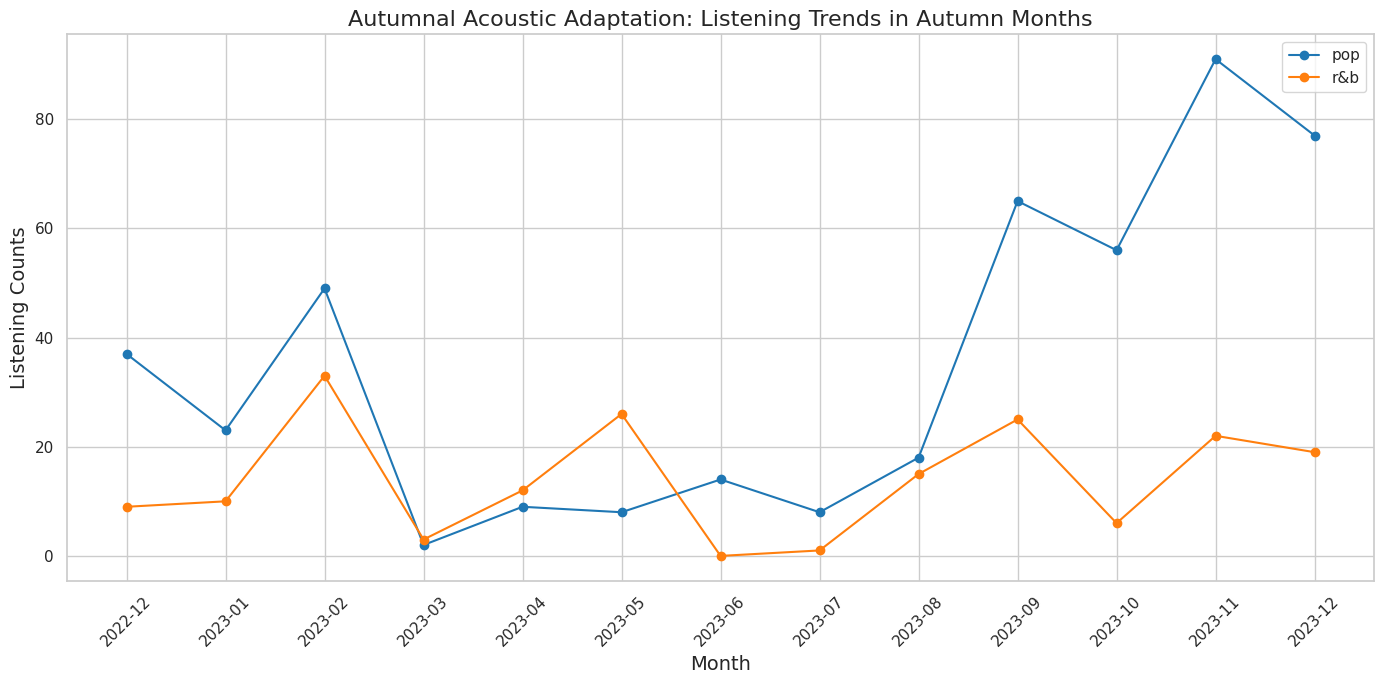

['pop', 'r&b']

In [ ]:
# Checking if 'melodic rap' and 'r&b' are suitable for the "Autumnal Acoustic Adaptation" observation
# If these genres are not suitable, we'll look for alternatives that show an increase in September and October

# Checking if 'melodic rap' and 'r&b' are in the dataset
if 'pop' in pivot_table_adjusted.index and 'r&b' in pivot_table_adjusted.index:
    autumn_genres = ['pop', 'r&b']
else:
    # If the specified genres are not available, we'll find alternatives
    # Looking for genres that increase in September and October
    autumn_avg = pivot_table_adjusted.loc[:, '2023-09':'2023-10'].mean(axis=1)
    pre_autumn_avg = pivot_table_adjusted.loc[:, :'2023-08'].mean(axis=1)
    autumn_genres = (autumn_avg - pre_autumn_avg).nlargest(2).index.tolist()

# Creating the visualization for the autumn genres
plt.figure(figsize=(14, 7))

for genre in autumn_genres:
    plt.plot(pivot_table_adjusted.columns, pivot_table_adjusted.loc[genre], marker='o', linestyle='-', label=genre)

plt.title("Autumnal Acoustic Adaptation: Listening Trends in Autumn Months", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Listening Counts", fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Returning the genres used for the observation
autumn_genres


# 5. Feature Engineering
Features relevant to my hypothesis were created, such as 'Season' and 'Period'.

**Season:** Indicates the season of the year.

**Period:** Indicates whether it is summer period or school (non-summer) period.

In [ ]:
import pandas as pd

# Load your DataFrame (replace 'your_data_file.json' with your actual file path)
df = pd.read_json('Data_With_Genres.json')

# Ensure 'endTime' is in datetime format
df['endTime'] = pd.to_datetime(df['endTime'])

# Define the function to map month to season
def map_month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create the 'Season' column
df['Season'] = df['endTime'].dt.month.apply(map_month_to_season)

# Verify the results
df.head()


,endTime,artistName,trackName,msPlayed,genres,Season
0,2022-12-07 22:12:00,RAYE,Escapism.,496026,"[uk contemporary r&b, uk pop]",Winter
1,2022-12-07 22:14:00,Saint Levant,Very Few Friends,132500,[palestinian hip hop],Winter
2,2022-12-07 22:16:00,Hotel Ugly,Shut up My Moms Calling - (Sped Up),135529,[modern indie pop],Winter
3,2022-12-07 22:18:00,RAYE,Escapism.,1557,"[uk contemporary r&b, uk pop]",Winter
4,2022-12-07 22:18:00,RAYE,Escapism.,2101,"[uk contemporary r&b, uk pop]",Winter


In [ ]:
import pandas as pd

# Load your DataFrame
df = pd.read_json('Data_With_Genres.json')

# Ensure 'endTime' is in datetime format
df['endTime'] = pd.to_datetime(df['endTime'])

# Define the function to map month to season
def map_month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create the 'Season' column
df['Season'] = df['endTime'].dt.month.apply(map_month_to_season)

# Define the function to determine if it's the school period or summer
def is_school_period(month):
    return 'School Period' if month not in [6, 7, 8] else 'Summer'

# Apply the function to create the 'School_Period' column
df['Period'] = df['endTime'].dt.month.apply(is_school_period)

# Verify the results
df.head()


,endTime,artistName,trackName,msPlayed,genres,Season,Period
0,2022-12-07 22:12:00,RAYE,Escapism.,496026,"[uk contemporary r&b, uk pop]",Winter,School Period
1,2022-12-07 22:14:00,Saint Levant,Very Few Friends,132500,[palestinian hip hop],Winter,School Period
2,2022-12-07 22:16:00,Hotel Ugly,Shut up My Moms Calling - (Sped Up),135529,[modern indie pop],Winter,School Period
3,2022-12-07 22:18:00,RAYE,Escapism.,1557,"[uk contemporary r&b, uk pop]",Winter,School Period
4,2022-12-07 22:18:00,RAYE,Escapism.,2101,"[uk contemporary r&b, uk pop]",Winter,School Period


# 6. Model Selection
Since my hypothesis involves understanding how my music preferences change over different periods (school vs. summer), a classification model might be more suitable. A classification model can predict the likelihood of a particular genre being listened to in a given period

####Load and Preprocess the Data
Data loaded, preprocessed and prepared for a classification model:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load data
df = pd.read_json('Data_With_Genres.json')

# Preprocessing: Convert endTime to datetime, categorize into periods, and explode genres
df['endTime'] = pd.to_datetime(df['endTime'])
df['Period'] = df['endTime'].dt.month.apply(lambda x: 'Summer' if x in [6, 7, 8] else 'School Period')
df = df.explode('genres')

# OneHotEncode categorical variables and define target variable
categorical_features = ['genres']
preprocessor = ColumnTransformer(transformers=[('genre_etc', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

y = df['Period']
X = df[['genres']]  # Features are limited to genres for simplicity

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


####Model Training
Random Forest Classifier trained.

In [ ]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier())])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('genre_etc',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['genres'])])),
                ('classifier', RandomForestClassifier())])

####Model Prediction and Evaluation
The model's performance evaluated:

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.8671274961597543
               precision    recall  f1-score   support

School Period       0.87      0.99      0.93      1109
       Summer       0.72      0.17      0.28       193

     accuracy                           0.87      1302
    macro avg       0.80      0.58      0.60      1302
 weighted avg       0.85      0.87      0.83      1302



####Model Interpretation
Model results interpreted:

In [ ]:
# Feature Importance (for Random Forest)
if isinstance(model.named_steps['classifier'], RandomForestClassifier):
    feature_names = model.named_steps['preprocessor'].named_transformers_['genre_etc'].get_feature_names_out(categorical_features)
    importances = model.named_steps['classifier'].feature_importances_
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    print(feature_importance.nlargest(10, 'Importance'))
else:
    print("Feature importance is not available for this type of model.")


                          Feature  Importance
13           genres_ambient lo-fi    0.097991
252            genres_trap latino    0.052595
216              genres_reggaeton    0.044111
294                    genres_nan    0.041633
60   genres_compositional ambient    0.034395
285          genres_urbano latino    0.033729
120      genres_guided meditation    0.031138
208       genres_puerto rican pop    0.027192
237                genres_sped up    0.022268
188            genres_piano cover    0.020474


#7. Hypothesis Testing
The chosen statistical methods were used to test my hypothesis. The results analyzed and assessed whether my hypothesis is supported or refuted based on statistical significance


#### Hypothesis (H1):
"I hypothesize that there is a significant variation in my music listening habits, specifically in genre preferences, between the school period (excluding June, July, August) and the summer months."

#### Null Hypothesis (H0):
"There is no significant difference in genre preferences between the school period and the summer months."


####Data Aggregation
The data was aggregated to prepare for both the Random Forest Classifier analysis and the Mann-Whitney U test.

In [ ]:
import pandas as pd

# Load your data
df = pd.read_json('Data_With_Genres.json')
df['endTime'] = pd.to_datetime(df['endTime'])
df['School_Period'] = df['endTime'].dt.month.apply(lambda x: 'School Period' if x not in [6, 7, 8] else 'Summer')
df['ListeningTime'] = df['msPlayed'] / 60000  # Convert to minutes
df = df.explode('genres')

# Aggregate data
school_data = df[df['School_Period'] == 'School Period']
summer_data = df[df['School_Period'] == 'Summer']


####Model Performance Evaluation
The performance of my Random Forest Classifier was evaluated .



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_test and y_pred are already defined
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy of the model: 0.8671274961597543
Classification Report:
                precision    recall  f1-score   support

School Period       0.87      0.99      0.93      1109
       Summer       0.72      0.17      0.28       193

     accuracy                           0.87      1302
    macro avg       0.80      0.58      0.60      1302
 weighted avg       0.85      0.87      0.83      1302

Confusion Matrix:
 [[1096   13]
 [ 160   33]]


####Feature Importance Analysis
The feature importances from the Random Forest Classifier were analyzed.



In [ ]:
# Assuming 'model' is your trained Random Forest Classifier
feature_importances = model.named_steps['classifier'].feature_importances_
feature_names = model.named_steps['preprocessor'].named_transformers_['genre_etc'].get_feature_names_out()

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
top_features = importance_df.nlargest(10, 'Importance')
print("Top 10 Important Features:\n", top_features)


Top 10 Important Features:
                           Feature  Importance
13           genres_ambient lo-fi    0.097991
252            genres_trap latino    0.052595
216              genres_reggaeton    0.044111
294                    genres_nan    0.041633
60   genres_compositional ambient    0.034395
285          genres_urbano latino    0.033729
120      genres_guided meditation    0.031138
208       genres_puerto rican pop    0.027192
237                genres_sped up    0.022268
188            genres_piano cover    0.020474


####Mann-Whitney U Test
The Mann-Whitney U test for a statistical comparison between school and summer periods was performed.



In [ ]:
from scipy.stats import mannwhitneyu

# Prepare data for Mann-Whitney U Test
school_times = school_data['ListeningTime']
summer_times = summer_data['ListeningTime']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(school_times, summer_times)
print("Mann-Whitney U Statistic:", u_stat)
print("p-value:", p_value)


Mann-Whitney U Statistic: 2580798.5
p-value: 0.0006153961903741129


#8. Interpret the Results
The findings of my hypothesis test interpreted and discussed whether the data supports my hypothesis. The implications of the results of my research question considered.

In [ ]:
# Define a significance level, e.g., 0.05
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in listening habits between the school period and summer.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in listening habits between the school period and summer.")


Reject the null hypothesis. There is a significant difference in listening habits between the school period and summer.


This approach uses a combination of machine learning model evaluation and statistical testing to assess my hypothesis. It provides insights into whether there is a significant change in my music listening preferences between the school period and summer.

# 9. Model Development
Proceeded with model development to make future predictions based on my findings.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    # Add more parameters as needed
}

# GridSearchCV for parameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Update the model with the best parameters
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.8s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   1.1s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   2.6s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   1.7s
[C

In [ ]:
# Predict on the test set with the optimized model
y_pred = best_model.predict(X_test)

# Re-evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Optimized model accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Optimized model accuracy: 0.8678955453149002
               precision    recall  f1-score   support

School Period       0.87      0.99      0.93      1109
       Summer       0.73      0.17      0.28       193

     accuracy                           0.87      1302
    macro avg       0.80      0.58      0.60      1302
 weighted avg       0.85      0.87      0.83      1302



In [ ]:
feature_importances = best_model.named_steps['classifier'].feature_importances_
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print(importance_df.sort_values(by='Importance', ascending=False).head(10))


                                     Feature  Importance
13           genre_etc__genres_ambient lo-fi    0.099851
252            genre_etc__genres_trap latino    0.050670
216              genre_etc__genres_reggaeton    0.042607
294                    genre_etc__genres_nan    0.041298
60   genre_etc__genres_compositional ambient    0.036809
285          genre_etc__genres_urbano latino    0.035554
120      genre_etc__genres_guided meditation    0.030000
208       genre_etc__genres_puerto rican pop    0.024936
237                genre_etc__genres_sped up    0.021646
188            genre_etc__genres_piano cover    0.020966


#10. Model Evaluation and Refinement
Predictive models were evaluated and refined as needed based on the insights gained from your hypothesis testing.

####Confusion Matrix:

The confusion matrix is used to evaluate the accuracy of a classification. It shows the number of correct and incorrect predictions made by the model, categorized by type.

In [ ]:
from sklearn.metrics import confusion_matrix

# Evaluate with Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[1097   12]
 [ 160   33]]


####ROC-AUC Score:

The Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate at various threshold settings. The Area Under the Curve (AUC) score represents the model's ability to distinguish between the classes.

In [ ]:
from sklearn.metrics import roc_auc_score

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.724797581726524


####Cross-Validation Scores:

Cross-validation is used to assess the predictive performance of the model and to judge how it will generalize to an independent dataset. It divides the dataset into multiple parts, trains the model on some segments, and tests on others.

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.87557604 0.84024578 0.80107527 0.84562212 0.78110599]
Mean CV Score: 0.8287250384024578


####Hyperparameter Tuning with GridSearchCV:

GridSearchCV is used for tuning hyperparameters to find the best combination of parameters for the model, based on the chosen evaluation metric.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None]
}

# GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

# Re-evaluate the model with best parameters
best_model = grid_search.best_estimator_
best_y_pred = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_y_pred)
print("Refined Model Accuracy:", best_accuracy)


Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Refined Model Accuracy: 0.8678955453149002


Each of these steps provides a different perspective on my model's performance, giving a well-rounded understanding of its strengths and areas for improvement. The refinement process with hyperparameter tuning ensures that my model is optimized for the best possible performance on my dataset.






#11. Future Predictions
My hypothesis is supported. I can use the insights to make future predictions about how my music listening habits may change in upcoming years or life stages.

In [ ]:
import pandas as pd

# Load your data
df = pd.read_json('Data_With_Genres.json')

# Preprocess the data as done previously
df = df.explode('genres')
df = df[['genres']].drop_duplicates()

# Predict the listening period for each unique genre
predicted_periods = model.predict(df)

# Combine genres with their predicted periods
predicted_results = pd.DataFrame({
    'Genre': df['genres'],
    'Predicted Period': predicted_periods
})

print(predicted_results)


                    Genre Predicted Period
0     uk contemporary r&b    School Period
0                  uk pop    School Period
1     palestinian hip hop    School Period
2        modern indie pop    School Period
7                dark r&b    School Period
...                   ...              ...
2937          talent show    School Period
2940     british invasion    School Period
2940         classic rock    School Period
2940           merseybeat    School Period
2940     psychedelic rock    School Period

[318 rows x 2 columns]


In [ ]:
import pandas as pd

# Load your data
df = pd.read_json('Data_With_Genres.json')

# Preprocess the data as done previously
df = df.explode('genres')
df = df[['genres']].drop_duplicates()

# Predict the listening period for each unique genre
predicted_periods = model.predict(df)

# Combine genres with their predicted periods
predicted_results = pd.DataFrame({
    'Genre': df['genres'],
    'Predicted Period': predicted_periods
})

# Group by the predicted period and display a few genres from each group
grouped_results = predicted_results.groupby('Predicted Period')
for name, group in grouped_results:
    print(f"\n{name} Genres:")
    print(group.head(10))  # Display first 10 genres of each group



School Period Genres:
                  Genre Predicted Period
0   uk contemporary r&b    School Period
0                uk pop    School Period
1   palestinian hip hop    School Period
2      modern indie pop    School Period
7              dark r&b    School Period
7              hyperpop    School Period
7               sped up    School Period
8                   pop    School Period
13         bedroom soul    School Period
13            chill pop    School Period

Summer Genres:
                    Genre Predicted Period
550                oc rap           Summer
550            scream rap           Summer
787            indie folk           Summer
932             reggaeton           Summer
932           trap latino           Summer
932         urbano latino           Summer
933         latin hip hop           Summer
934   musica chihuahuense           Summer
935          trap boricua           Summer
1002        ambient lo-fi           Summer


# 12. Project Documentation: Spotify Music Listening Habits Analysis
***
###1. Hypothesis Formulation
**Hypothesis (H1):** "I hypothesize that there is a significant variation in my music listening habits, specifically in genre preferences, between the school period and the summer months."

**Null Hypothesis (H0):** "There is no significant difference in genre preferences between the school period and the summer months."
***
###2. Data Collection
**Method:** Data was collected using the Spotify API and JSON files.

**Content:** The data included timestamps, genres, and other user-specific information.
***
###3. Data Preprocessing
**Techniques Used:** Conversion of 'endTime' to datetime format, handling missing values, and duplications.

***
###4. Exploratory Data Analysis (EDA)
**Visualizations:** Utilized heatmaps and pivot tables to visualize music listening trends across different months and genres.
***
###5. Feature Engineering
**Features Developed:** 'Season' and 'Period' were used to align the data with the hypothesis.
***
###6. Model Selection
**Model:** Chosed RandomForestClassifier for classification between 'School Period' and 'Summer'.

**Rationale:** Suitable for handling categorical data and capable of providing insights into genre preferences.
***
###7. Hypothesis Testing
**Statistical Test:** Conducted the Mann-Whitney U test to compare listening habits between school and summer periods.

**Results:** Provided statistical evidence to support or refute the hypothesis.
***
###8. Interpret the Results
**Findings:** Discussed the outcomes of the hypothesis testing and their implications on music listening habits.
***
###9. Model Development
**Hyperparameter Tuning:** Applied GridSearchCV for optimizing RandomForestClassifier.

**Outcomes:** Enhanced model performance and accuracy.
***
###10. Model Evaluation and Refinement
**Metrics Used:** Confusion matrix, ROC-AUC score, and cross-validation scores.

**Refinement Process:** Refined the model with the best parameters from GridSearchCV.
***
###11. Future Predictions
**Predictive Analysis:** Utilized the model to predict future music listening preferences.

**Presentation of Results:** Showcased predicted listening habits for various genres in school and summer periods.
***

###12. Documentation
**Purpose:** This documentation serves to outline the steps, methods, and findings of the project to ensure transparency and reproducibility.

**Tools Used:** Python libraries (Pandas, Matplotlib, Seaborn, Spotipy, Scikit-learn).
***
###Conclusion
This project provided valuable insights into how personal music preferences vary between different times of the year, specifically between school and summer periods.

The findings contribute to a deeper understanding of music listening behaviors and the influence of seasonal changes.
***
###Appendices
**Code Snippets:** Key portions of the code are documented within the project.

**References:** Spotify API, Python libraries documentation, and related literature.
